# Calculate statistics of the dataset

Plot a histogram, count the total points, and calculate the mean, median, and variance.

---

### 1. Load packages and open dataset

In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = xr.open_dataset('../data/clean/Filtered_ZachariaeIsstromVelocitySeries.nc')

### Plot histogram of data points
This plot displays the number of velocity data points for each year in the dataset

(array([19., 37., 60., 57., 60., 61., 61., 30., 30., 10.]),
 array([2015. , 2015.9, 2016.8, 2017.7, 2018.6, 2019.5, 2020.4, 2021.3,
        2022.2, 2023.1, 2024. ]),
 <BarContainer object of 10 artists>)

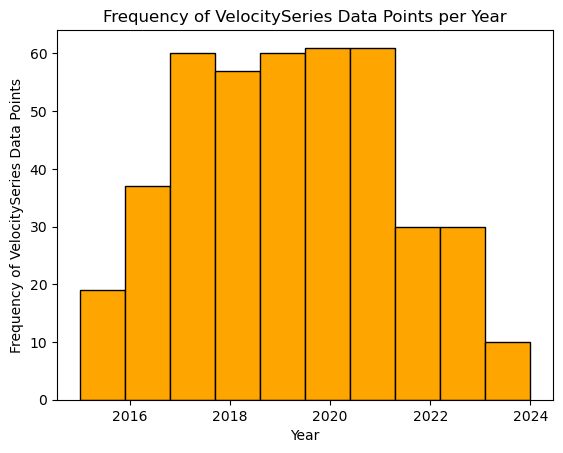

In [18]:
data['year'] = data['time'].dt.year

plt.xlabel('Year')
plt.ylabel('Frequency of VelocitySeries Data Points')
plt.title('Frequency of VelocitySeries Data Points per Year')
plt.hist(data['year'], color='orange', edgecolor='black')

The most samples occur from 2017-2021, when Landsat-8, Sentinel-1, and Sentinel-2 overlapped.

In [19]:
print("There are " + str(len(data['year'])) + " data points in the dataset.")

There are 425 data points in the dataset.


In [29]:
mean_velocity = data['cleaned_velocity'].mean().item()
median_velocity = data['cleaned_velocity'].median().item()
variance_velocity = data['cleaned_velocity'].var().item()

print(f"Mean Velocity: {mean_velocity}")
print(f"Median Velocity: {median_velocity}")
print(f"Variance of Velocity: {variance_velocity}")

Mean Velocity: 1204.959228515625
Median Velocity: 1204.1123046875
Variance of Velocity: 2737.358642578125


The velocity has a high variance likely because of seasonal fluctuations increasing over the years, causing for more variation in the data due to climate warming.

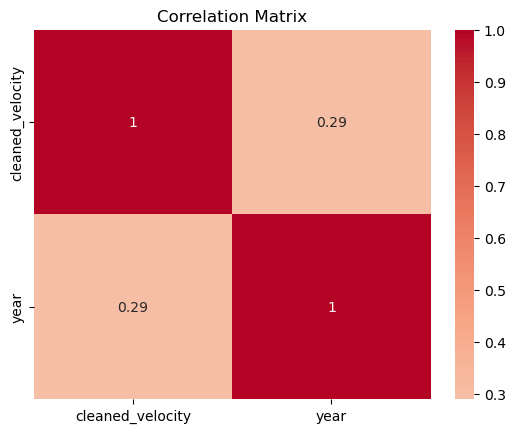

In [37]:
# Convert xarray Dataset to pandas DataFrame
df = data.to_dataframe()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()